In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statistics as stats

In [3]:
train = pd.read_csv('titanic/train.csv')

In [5]:
test = pd.read_csv('titanic/test.csv')

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train.set_index('PassengerId', inplace=True)

In [13]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
test.set_index('PassengerId', inplace=True)

In [15]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [17]:
train.shape

(891, 11)

In [18]:
test.shape

(418, 10)

In [19]:
test['Survived'] = np.nan

In [21]:
test.shape

(418, 11)

In [22]:
data = pd.concat([train, test], sort=False)

In [23]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [27]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge', 'PaisFilhos', 'Bilhete',
       'Tarifa', 'Cabine', 'Embarque']

In [28]:
data.columns

Index(['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque'],
      dtype='object')

In [29]:
dic = {'male': 'homem', 'female': 'mulher'}

In [34]:
data['Sexo'].replace(dic, inplace=True)

In [35]:
data

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",homem,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",mulher,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",homem,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [36]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

In [37]:
data.drop('Cabine',axis=1,inplace=True)

In [38]:
data

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Embarque
PassengerId,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,S
5,0.0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",homem,NaN,0,0,A.5. 3236,8.0500,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",mulher,39.0,0,0,PC 17758,108.9000,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",homem,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S


In [39]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

In [42]:
data.groupby(by='Embarque').count()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa
Embarque,,,,,,,,,
C,168,270,270,270,212,270,270,270,270
Q,77,123,123,123,50,123,123,123,123
S,644,914,914,914,782,914,914,914,913


In [43]:
data['Embarque'].fillna('S', inplace=True)

In [44]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

In [45]:
data['Embarque'].mode()

0    S
dtype: object

In [49]:
media = data['Tarifa'].mean()

In [50]:
data['Tarifa'].fillna(media,inplace=True)

In [51]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

<AxesSubplot:>

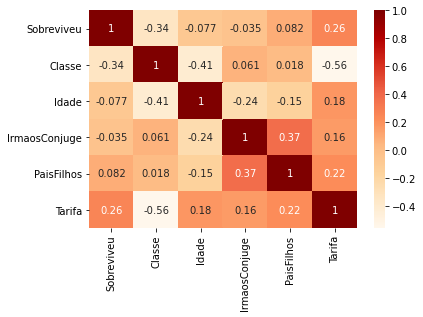

In [55]:
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

In [56]:
data.drop('Sobreviveu',axis=1,inplace=True)

In [57]:
data

,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Embarque
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",homem,NaN,0,0,A.5. 3236,8.0500,S
1306,1,"Oliva y Ocana, Dona. Fermina",mulher,39.0,0,0,PC 17758,108.9000,C
1307,3,"Saether, Mr. Simon Sivertsen",homem,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S


In [58]:
data.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

In [68]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [73]:
data.groupby('Titulo').count()['Classe']

Titulo
Capt          1
Col           4
Countess      1
Don           1
Dona          1
Dr            8
Jonkheer      1
Lady          1
Major         2
Master       61
Miss        260
Mlle          2
Mme           1
Mr          757
Mrs         197
Ms            2
Rev           8
Sir           1
Name: Classe, dtype: int64

In [74]:
lista_nomes = ['Master','Miss','Mr','Mrs']

In [76]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in lista_nomes else x)

In [77]:
data.groupby('Titulo').count()['Classe']

Titulo
Master     61
Miss      260
Mr        757
Mrs       197
Outros     34
Name: Classe, dtype: int64

In [78]:
titulos_traduzidos = {'Master': 'Menino', 'Miss': 'Solteira', 'Mr': 'HomemAdulto', 'Mrs': 'Casada'}

In [79]:
data['Titulo'].replace(titulos_traduzidos, inplace=True)

In [80]:
data.groupby('Titulo').count()['Classe']

Titulo
Casada         197
HomemAdulto    757
Menino          61
Outros          34
Solteira       260
Name: Classe, dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo           1309 non-null   object 
 3   Idade          1046 non-null   float64
 4   IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos     1309 non-null   int64  
 6   Bilhete        1309 non-null   object 
 7   Tarifa         1309 non-null   float64
 8   Embarque       1309 non-null   object 
 9   Titulo         1309 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 144.8+ KB


In [82]:
data.drop(['Nome','Bilhete'],axis=1,inplace=True)

In [83]:
data

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto
2,1,mulher,38.0,1,0,71.2833,C,Casada
3,3,mulher,26.0,0,0,7.9250,S,Solteira
4,1,mulher,35.0,1,0,53.1000,S,Casada
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto
...,...,...,...,...,...,...,...,...
1305,3,homem,NaN,0,0,8.0500,S,HomemAdulto
1306,1,mulher,39.0,0,0,108.9000,C,Outros
1307,3,homem,38.5,0,0,7.2500,S,HomemAdulto


In [94]:
solteiras_com_pais = data.loc[data['Titulo']=='Solteira'].loc[data['PaisFilhos']>=1]

(array([24.,  6., 11.,  5., 12.,  9.,  4.,  2.,  0.,  3.]),
 array([ 0.17 ,  4.053,  7.936, 11.819, 15.702, 19.585, 23.468, 27.351,
        31.234, 35.117, 39.   ]),
 <BarContainer object of 10 artists>)

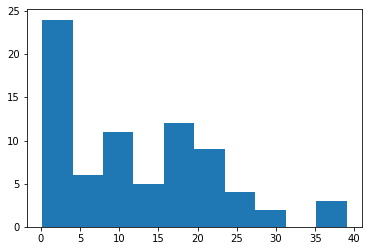

In [99]:
plt.hist(solteiras_com_pais['Idade'])

In [100]:
data.loc[data['Titulo']=='Solteira'].mean()

Classe            2.346154
Idade            21.774238
IrmaosConjuge     0.665385
PaisFilhos        0.503846
Tarifa           42.684873
dtype: float64

(array([30., 14., 44., 50., 35., 18., 10.,  5.,  1.,  3.]),
 array([ 0.17 ,  6.453, 12.736, 19.019, 25.302, 31.585, 37.868, 44.151,
        50.434, 56.717, 63.   ]),
 <BarContainer object of 10 artists>)

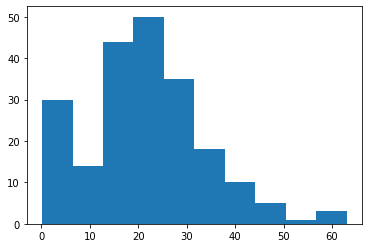

In [101]:
plt.hist(data.loc[data['Titulo']=='Solteira']['Idade'])

In [102]:
solteiras_com_pais['Idade'].mean()

12.178815789473683

In [103]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()

21.774238095238097

In [104]:
data.loc[data['Titulo']=='Casada']['Idade'].mean()

36.99411764705882

In [108]:
dummylist = list(solteiras_com_pais.index)

In [106]:
data['solteirapais'] = 0

In [107]:
data

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteirapais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,mulher,38.0,1,0,71.2833,C,Casada,0
3,3,mulher,26.0,0,0,7.9250,S,Solteira,0
4,1,mulher,35.0,1,0,53.1000,S,Casada,0
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto,0
...,...,...,...,...,...,...,...,...,...
1305,3,homem,NaN,0,0,8.0500,S,HomemAdulto,0
1306,1,mulher,39.0,0,0,108.9000,C,Outros,0
1307,3,homem,38.5,0,0,7.2500,S,HomemAdulto,0


In [124]:
i=0
while i < len(dummylist):
    data['solteirapais'].loc[dummylist[i]] = 1
    i=i+1

C:\Users\jvfdi\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [126]:
data.loc[data['solteirapais']==1].mean()

Classe            2.302326
Idade            12.178816
IrmaosConjuge     1.686047
PaisFilhos        1.523256
Tarifa           51.192345
solteirapais      1.000000
dtype: float64

In [127]:
data

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteirapais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,mulher,38.0,1,0,71.2833,C,Casada,0
3,3,mulher,26.0,0,0,7.9250,S,Solteira,0
4,1,mulher,35.0,1,0,53.1000,S,Casada,0
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto,0
...,...,...,...,...,...,...,...,...,...
1305,3,homem,NaN,0,0,8.0500,S,HomemAdulto,0
1306,1,mulher,39.0,0,0,108.9000,C,Outros,0
1307,3,homem,38.5,0,0,7.2500,S,HomemAdulto,0


In [128]:
data['Sexo'].replace({'homem':0,'mulher':1}, inplace=True)

In [129]:
data

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteirapais
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,1,38.0,1,0,71.2833,C,Casada,0
3,3,1,26.0,0,0,7.9250,S,Solteira,0
4,1,1,35.0,1,0,53.1000,S,Casada,0
5,3,0,35.0,0,0,8.0500,S,HomemAdulto,0
...,...,...,...,...,...,...,...,...,...
1305,3,0,NaN,0,0,8.0500,S,HomemAdulto,0
1306,1,1,39.0,0,0,108.9000,C,Outros,0
1307,3,0,38.5,0,0,7.2500,S,HomemAdulto,0


In [130]:
data = pd.get_dummies(data=data,columns=['Classe','Embarque','Titulo'],drop_first=True)

In [131]:
data

,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,solteirapais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira
PassengerId,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,1,0,0,0
2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,0,0
5,0,35.0,0,0,8.0500,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,NaN,0,0,8.0500,0,0,1,0,1,1,0,0,0
1306,1,39.0,0,0,108.9000,0,0,0,0,0,0,0,1,0
1307,0,38.5,0,0,7.2500,0,0,1,0,1,1,0,0,0


In [132]:
train_idade = data.dropna()

In [162]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade',axis=1)

In [140]:
train_idade.isnull().sum()

Sexo                  0
Idade                 0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteirapais          0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Outros         0
Titulo_Solteira       0
dtype: int64

In [141]:
test_idade.isnull().sum()

Sexo                  0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteirapais          0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Outros         0
Titulo_Solteira       0
dtype: int64

In [142]:
train_idade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1307
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sexo                1046 non-null   int64  
 1   Idade               1046 non-null   float64
 2   IrmaosConjuge       1046 non-null   int64  
 3   PaisFilhos          1046 non-null   int64  
 4   Tarifa              1046 non-null   float64
 5   solteirapais        1046 non-null   int64  
 6   Classe_2            1046 non-null   uint8  
 7   Classe_3            1046 non-null   uint8  
 8   Embarque_Q          1046 non-null   uint8  
 9   Embarque_S          1046 non-null   uint8  
 10  Titulo_HomemAdulto  1046 non-null   uint8  
 11  Titulo_Menino       1046 non-null   uint8  
 12  Titulo_Outros       1046 non-null   uint8  
 13  Titulo_Solteira     1046 non-null   uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 65.4 KB


In [143]:
test_idade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 6 to 1309
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sexo                263 non-null    int64  
 1   IrmaosConjuge       263 non-null    int64  
 2   PaisFilhos          263 non-null    int64  
 3   Tarifa              263 non-null    float64
 4   solteirapais        263 non-null    int64  
 5   Classe_2            263 non-null    uint8  
 6   Classe_3            263 non-null    uint8  
 7   Embarque_Q          263 non-null    uint8  
 8   Embarque_S          263 non-null    uint8  
 9   Titulo_HomemAdulto  263 non-null    uint8  
 10  Titulo_Menino       263 non-null    uint8  
 11  Titulo_Outros       263 non-null    uint8  
 12  Titulo_Solteira     263 non-null    uint8  
dtypes: float64(1), int64(4), uint8(8)
memory usage: 14.4 KB


In [144]:
X = train_idade.drop('Idade', axis=1)
y = train_idade['Idade']

In [146]:
y

PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1301     3.0
1303    37.0
1304    28.0
1306    39.0
1307    38.5
Name: Idade, Length: 1046, dtype: float64

In [147]:
from sklearn import linear_model

In [148]:
lm=linear_model.LinearRegression()

In [149]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [152]:
lm.fit(X_train, y_train)

LinearRegression()

In [153]:
pred = lm.predict(X_test)

In [154]:
from sklearn.metrics import mean_squared_error

In [155]:
lm.score(X_test, y_test)

0.482717043195658

In [156]:
mse = mean_squared_error(y_test, pred)

In [157]:
rmse = np.sqrt(mse)

In [158]:
rmse

10.3421529766453

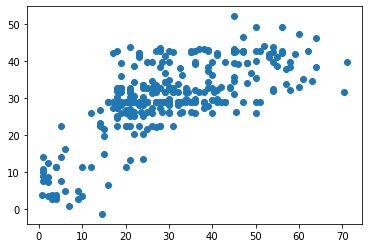

In [159]:
plt.scatter(y_test,pred)

In [163]:
pred_idade = lm.predict(test_idade)

In [164]:
pred_idade

array([31.67001478, 32.6417804 , 27.48359296, 26.21908031, 25.13850349,
       29.07745676, 39.05726519, 25.13966816, 26.21904245, 26.21303341,
       29.07606673, 30.70195155, 25.13966816, 24.27961128, 42.56255534,
       39.76825732,  1.12570852, 29.07745676, 29.07606673, 25.13933011,
       29.07606673, 29.07606673, 29.07745676, 29.07854571, 24.08724483,
       29.07606673, 31.67639973,  5.96564894, 30.68086431, 29.0827149 ,
       29.07054537, -1.19670668, 45.28607317, 42.64886886,  2.08882379,
        3.70734913, 29.75887738, 42.43184556, 31.96646419, 31.67639973,
       25.13966816, 24.5545631 , 30.77181367, 29.07745676,  6.9928796 ,
       22.54384239, 18.71259529, 24.16521997, 29.08327831, 40.5687124 ,
       31.67639973, 25.13966816, 42.60312044, 25.13966816, 32.75896847,
       42.64819278, 39.76825732, 42.60762767, 25.13966816, 29.72750337,
       28.70853689, 29.07606673, 32.48186011, 24.5545631 , 23.19077179,
       42.03771195, 29.07745676, 29.36342686, 42.56706257, 26.21

In [166]:
test_idade['Idade'] = pred_idade

In [167]:
test_idade

,Sexo,IrmaosConjuge,PaisFilhos,Tarifa,solteirapais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,Idade
PassengerId,,,,,,,,,,,,,,
6,0,0,0,8.4583,0,0,1,1,0,1,0,0,0,31.670015
18,0,0,0,13.0000,0,1,0,0,1,1,0,0,0,32.641780
20,1,0,0,7.2250,0,0,1,0,0,0,0,0,0,27.483593
27,0,0,0,7.2250,0,0,1,0,0,1,0,0,0,26.219080
29,1,0,0,7.8792,0,0,1,1,0,0,0,0,1,25.138503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1,0,0,7.7208,0,0,1,1,0,0,0,0,1,25.139931
1302,1,0,0,7.7500,0,0,1,1,0,0,0,0,1,25.139668
1305,0,0,0,8.0500,0,0,1,0,1,1,0,0,0,29.076067


In [169]:
idade = pd.concat([test_idade, train_idade])

In [176]:
idade.index

Int64Index([   6,   18,   20,   27,   29,   30,   32,   33,   37,   43,
            ...
            1295, 1296, 1297, 1298, 1299, 1301, 1303, 1304, 1306, 1307],
           dtype='int64', name='PassengerId', length=1309)

In [174]:
train_idade.shape

(1046, 14)

In [177]:
idade_competa = pd.DataFrame({'IdPassageiro': idade.index, 'Idade': idade['Idade']})

In [181]:
idade_competa.to_csv('idade_completa.csv', index=False)

In [183]:
idade_competa.isnull().sum()

IdPassageiro    0
Idade           0
dtype: int64

In [190]:
idade.loc[4]

Sexo                   1.0
IrmaosConjuge          1.0
PaisFilhos             0.0
Tarifa                53.1
solteirapais           0.0
Classe_2               0.0
Classe_3               0.0
Embarque_Q             0.0
Embarque_S             1.0
Titulo_HomemAdulto     0.0
Titulo_Menino          0.0
Titulo_Outros          0.0
Titulo_Solteira        0.0
Idade                 35.0
Name: 4, dtype: float64